## BANK LOAN DEFAULTS ANALYSIS

## Importing Libraries

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [57]:
df=pd.read_csv("Loan_default.csv")
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


## Data Analysis And Cleaning 

In [58]:
df.index

RangeIndex(start=0, stop=255347, step=1)

In [59]:
df.tail()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0
255346,ZTH91CGL0B,62,22418,18481,636,113,2,6.73,12,0.48,Bachelor's,Unemployed,Divorced,Yes,No,Education,Yes,0


In [60]:
df.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [62]:
df.shape

(255347, 18)

In [63]:
df.describe(include='object')

,LoanID,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
count,255347,255347,255347,255347,255347,255347,255347,255347
unique,255347,4,4,3,2,2,5,2
top,I38PQUQS96,Bachelor's,Part-time,Married,Yes,Yes,Business,Yes
freq,1,64366,64161,85302,127677,127742,51298,127701


In [64]:
## To remove duplicate values 
df.drop_duplicates(inplace=True)
uni_rows=df.shape[0]
uni_rows

255347

In [65]:
null_value = df.isnull() == True
df.fillna(np.nan, inplace = True)

df # we replace all the null value as NaN.

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


In [66]:
rem_val = df.isnull().sum().sort_values(ascending=False)
rem_val

LoanID            0
Age               0
HasCoSigner       0
LoanPurpose       0
HasDependents     0
HasMortgage       0
MaritalStatus     0
EmploymentType    0
Education         0
DTIRatio          0
LoanTerm          0
InterestRate      0
NumCreditLines    0
MonthsEmployed    0
CreditScore       0
LoanAmount        0
Income            0
Default           0
dtype: int64

In [67]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [68]:
print(df.apply(lambda col: col.unique()))

LoanID            [I38PQUQS96, HPSK72WA7R, C1OZ6DPJ8Y, V2KKSFM3U...
Age               [56, 69, 46, 32, 60, 25, 38, 36, 40, 28, 41, 5...
Income            [85994, 50432, 84208, 31713, 20437, 90298, 111...
LoanAmount        [50587, 124440, 129188, 44799, 9139, 90448, 17...
CreditScore       [520, 458, 451, 743, 633, 720, 429, 531, 827, ...
MonthsEmployed    [80, 15, 26, 0, 8, 18, 67, 83, 114, 94, 56, 87...
NumCreditLines                                         [4, 1, 3, 2]
InterestRate      [15.23, 4.81, 21.17, 7.07, 6.51, 22.72, 19.11,...
LoanTerm                                       [36, 60, 24, 48, 12]
DTIRatio          [0.44, 0.68, 0.31, 0.23, 0.73, 0.1, 0.16, 0.43...
Education                  [Bachelor's, Master's, High School, PhD]
EmploymentType    [Full-time, Unemployed, Self-employed, Part-time]
MaritalStatus                           [Divorced, Married, Single]
HasMortgage                                               [Yes, No]
HasDependents                                   

## Data Filtering and Grouping 

In [69]:
# Get only those rows where the customer defaulted on their loan
df_defaulted = df[df['Default'] == 1]
df_defaulted

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
5,A9S62RQ7US,25,90298,90448,720,18,2,22.72,24,0.10,High School,Unemployed,Single,Yes,No,Business,Yes,1
8,1R0N3LGNRJ,36,42053,92357,827,83,1,23.94,48,0.20,Bachelor's,Self-employed,Divorced,Yes,No,Education,No,1
11,Y8UETC3LSG,28,149227,139759,375,56,3,5.84,36,0.80,PhD,Full-time,Divorced,No,No,Education,Yes,1
18,O1IKKLC69B,19,40718,78515,319,119,2,14.00,24,0.17,Bachelor's,Self-employed,Divorced,Yes,No,Education,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255310,F40NYFL3QR,65,111206,112192,315,3,3,20.17,36,0.63,High School,Unemployed,Married,Yes,Yes,Auto,No,1
255324,Q8OXUYF0TI,50,34641,108855,347,17,4,11.77,24,0.47,PhD,Unemployed,Divorced,Yes,No,Business,No,1
255333,BM4B25R7EI,22,45575,43355,545,99,1,21.86,12,0.52,PhD,Unemployed,Married,Yes,Yes,Education,No,1
255341,AKXAXQN7PG,40,129890,116119,701,38,3,9.91,24,0.23,High School,Part-time,Divorced,Yes,No,Home,Yes,1


In [70]:
# Select rows where Income is greater than 50000
df_high_income = df[df['Income'] > 50000]
df_high_income.value_counts()

LoanID      Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  InterestRate  LoanTerm  DTIRatio  Education    EmploymentType  MaritalStatus  HasMortgage  HasDependents  LoanPurpose  HasCoSigner  Default
0003HW9UAA  51   121373  87300       358          13              3               18.10         12        0.85      Bachelor's   Part-time       Divorced       No           No             Other        Yes          0          1
O0MS84ALQD  48   51069   211823      713          50              1               16.07         36        0.32      Master's     Part-time       Single         Yes          No             Other        Yes          0          1
O0KS5U2MPE  30   83949   219378      301          3               4               24.66         36        0.16      Master's     Part-time       Married        Yes          No             Business     No           0          1
O0KX4R564L  19   145506  83013       382          7               3               3.23          2

In [71]:
# Apply multiple conditions using & (AND)
df_young_employed = df[(df['Age'] < 35) & (df['EmploymentType'] != 'Unemployed')]
df_young_employed

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
11,Y8UETC3LSG,28,149227,139759,375,56,3,5.84,36,0.80,PhD,Full-time,Divorced,No,No,Education,Yes,1
18,O1IKKLC69B,19,40718,78515,319,119,2,14.00,24,0.17,Bachelor's,Self-employed,Divorced,Yes,No,Education,No,1
23,LXK7UEMLK0,19,118989,123300,528,73,3,15.29,36,0.22,PhD,Part-time,Single,Yes,No,Business,Yes,1
26,C35RYEXWJ0,29,114651,197648,343,58,3,21.07,24,0.19,Bachelor's,Part-time,Married,Yes,No,Home,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255300,DW7METGD15,19,39455,184347,555,3,4,3.90,36,0.71,PhD,Self-employed,Single,Yes,No,Auto,No,0
255301,7BC4VARPD0,33,65515,171841,792,7,1,18.46,60,0.55,High School,Full-time,Married,Yes,Yes,Business,Yes,0
255305,JZP7ZDL3HH,22,141370,132021,560,63,1,2.47,60,0.27,Master's,Part-time,Divorced,Yes,No,Education,No,1
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0


In [72]:
#Filter people with high interest loans (>15%) and low credit score (<600)
df_risky_loans = df[(df['InterestRate'] > 15) & (df['CreditScore'] < 600)]
df_risky_loans

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
6,H8GXPAOS71,38,111188,177025,429,80,1,19.11,12,0.16,Bachelor's,Unemployed,Single,Yes,No,Home,Yes,0
19,F7487UU2BF,41,123419,161146,376,65,4,16.96,60,0.39,High School,Self-employed,Single,Yes,No,Other,Yes,0
20,7ASF0IHRIT,61,30142,133714,429,96,1,15.58,12,0.65,PhD,Part-time,Divorced,No,Yes,Business,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255319,Z5D2O5UN2R,40,44144,177384,483,96,4,18.24,36,0.75,PhD,Part-time,Married,No,No,Education,Yes,0
255322,YFOVJ0QTVT,58,57577,97535,579,17,4,24.01,36,0.78,Master's,Part-time,Married,No,Yes,Auto,No,0
255323,OO16B1ODTG,51,74637,150129,437,8,1,17.75,60,0.38,PhD,Full-time,Married,Yes,Yes,Auto,No,0
255333,BM4B25R7EI,22,45575,43355,545,99,1,21.86,12,0.52,PhD,Unemployed,Married,Yes,Yes,Education,No,1


In [73]:
# Group by Education and calculate mean Income for each group
df.groupby('Education')['Income'].mean()


Education
Bachelor's     82580.142622
High School    82294.182949
Master's       82835.208936
PhD            82287.789587
Name: Income, dtype: float64

In [74]:
# Count how many defaulted and non-defaulted for each EmploymentType
df.groupby('EmploymentType')['Default'].value_counts()


EmploymentType  Default
Full-time       0          57632
                1           6024
Part-time       0          56484
                1           7677
Self-employed   0          56404
                1           7302
Unemployed      0          55174
                1           8650
Name: count, dtype: int64

In [75]:
df.groupby('MaritalStatus')['Default'].value_counts()


MaritalStatus  Default
Divorced       0          74376
               1          10657
Married        0          76433
               1           8869
Single         0          74885
               1          10127
Name: count, dtype: int64

In [76]:
# Average of Default (0 or 1) gives the default rate per purpose
df.groupby('LoanPurpose')['Default'].mean()


LoanPurpose
Auto         0.118814
Business     0.123260
Education    0.118381
Home         0.102348
Other        0.117885
Name: Default, dtype: float64

## Aggregations

In [77]:
df.min()

LoanID            0003HW9UAA
Age                       18
Income                 15000
LoanAmount              5000
CreditScore              300
MonthsEmployed             0
NumCreditLines             1
InterestRate             2.0
LoanTerm                  12
DTIRatio                 0.1
Education         Bachelor's
EmploymentType     Full-time
MaritalStatus       Divorced
HasMortgage               No
HasDependents             No
LoanPurpose             Auto
HasCoSigner               No
Default                    0
dtype: object

In [78]:
df.max()

LoanID            ZZZX015LV2
Age                       69
Income                149999
LoanAmount            249999
CreditScore              849
MonthsEmployed           119
NumCreditLines             4
InterestRate            25.0
LoanTerm                  60
DTIRatio                 0.9
Education                PhD
EmploymentType    Unemployed
MaritalStatus         Single
HasMortgage              Yes
HasDependents            Yes
LoanPurpose            Other
HasCoSigner              Yes
Default                    1
dtype: object

In [79]:
num_col = df.select_dtypes(include='number').columns
mean_v = df[num_col].mean()
mean_v

Age                   43.498306
Income             82499.304597
LoanAmount        127578.865512
CreditScore          574.264346
MonthsEmployed        59.541976
NumCreditLines         2.501036
InterestRate          13.492773
LoanTerm              36.025894
DTIRatio               0.500212
Default                0.116128
dtype: float64

In [80]:
median_v = df[num_col].median()
median_v

Age                   43.00
Income             82466.00
LoanAmount        127556.00
CreditScore          574.00
MonthsEmployed        60.00
NumCreditLines         2.00
InterestRate          13.46
LoanTerm              36.00
DTIRatio               0.50
Default                0.00
dtype: float64

In [81]:
var_v = df[num_col].var()
var_v

Age               2.247078e+02
Income            1.518116e+09
LoanAmount        5.018406e+09
CreditScore       2.525044e+04
MonthsEmployed    1.200163e+03
NumCreditLines    1.247728e+00
InterestRate      4.404238e+01
LoanTerm          2.879582e+02
DTIRatio          5.332248e-02
Default           1.026429e-01
dtype: float64

In [82]:
corr_v = df[num_col].corr()
corr_v

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
Age,1.000000,-0.001244,-0.002213,-0.000548,-0.000341,-0.000890,-0.001127,0.000263,-0.004689,-0.167783
Income,-0.001244,1.000000,-0.000865,-0.001430,0.002675,-0.002016,-0.002303,-0.000998,0.000205,-0.099119
LoanAmount,-0.002213,-0.000865,1.000000,0.001261,0.002817,0.000794,-0.002291,0.002538,0.001122,0.086659
CreditScore,-0.000548,-0.001430,0.001261,1.000000,0.000613,0.000016,0.000436,0.001130,-0.001039,-0.034166
MonthsEmployed,-0.000341,0.002675,0.002817,0.000613,1.000000,0.001267,0.000096,-0.001166,0.001765,-0.097374
NumCreditLines,-0.000890,-0.002016,0.000794,0.000016,0.001267,1.000000,-0.000297,-0.000226,-0.000586,0.028330
InterestRate,-0.001127,-0.002303,-0.002291,0.000436,0.000096,-0.000297,1.000000,0.000892,0.000575,0.131273
LoanTerm,0.000263,-0.000998,0.002538,0.001130,-0.001166,-0.000226,0.000892,1.000000,0.002273,0.000545
DTIRatio,-0.004689,0.000205,0.001122,-0.001039,0.001765,-0.000586,0.000575,0.002273,1.000000,0.019236
Default,-0.167783,-0.099119,0.086659,-0.034166,-0.097374,0.028330,0.131273,0.000545,0.019236,1.000000


## Data Visualisation

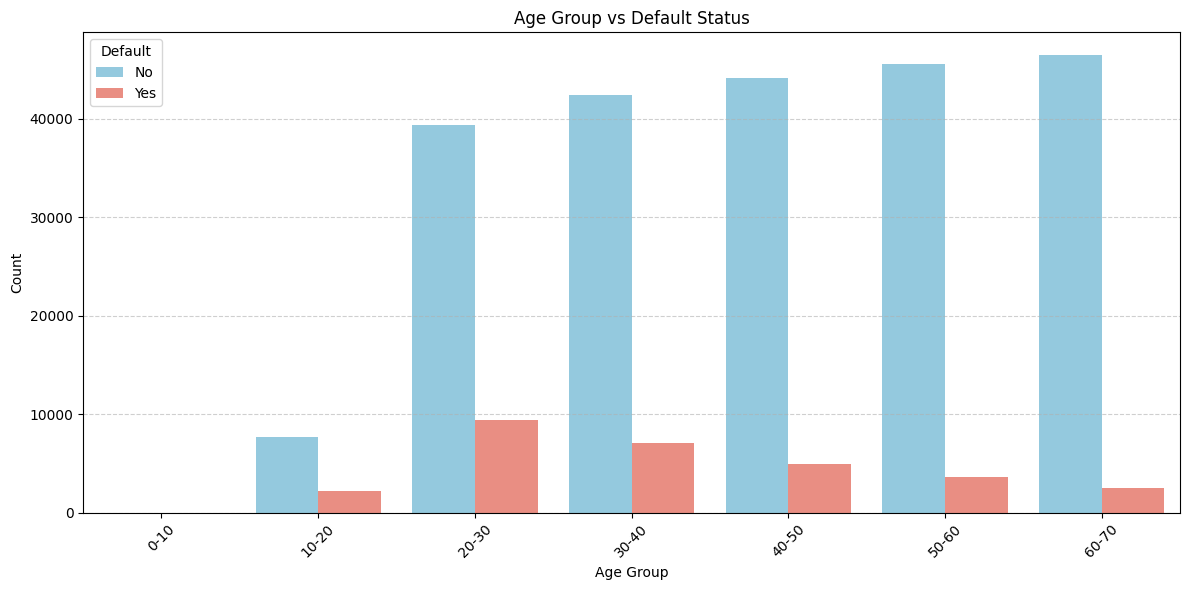

In [83]:
bins = list(range(0, 71, 10))
labels = [f"{i}-{i+10}" for i in bins[:-1]]
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Countplot of defaults in each AgeGroup
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='AgeGroup', hue='Default', palette=['skyblue', 'salmon'])

plt.title('Age Group vs Default Status')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Default', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


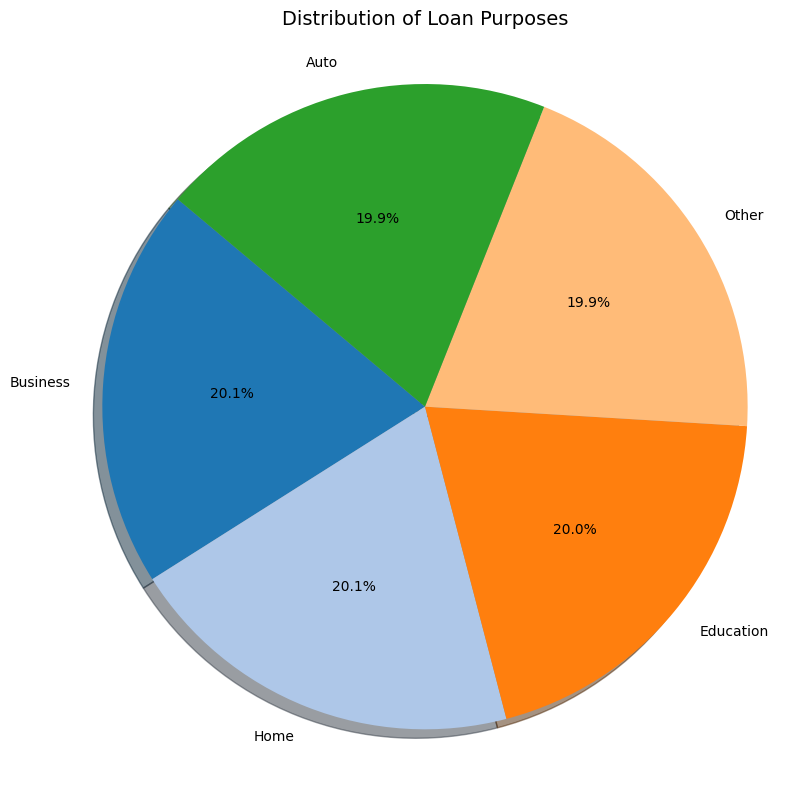

In [84]:
loan_purpose_counts = df['LoanPurpose'].value_counts()

# Step 3: Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(loan_purpose_counts, 
        labels=loan_purpose_counts.index, 
        autopct='%1.1f%%',
        startangle=140, 
        shadow=True, 
        colors=plt.cm.tab20.colors)  # Using a colormap for distinct colors

plt.title('Distribution of Loan Purposes', fontsize=14)
plt.axis('equal')  # Equal aspect ratio makes the pie chart circular
plt.tight_layout()
plt.show()

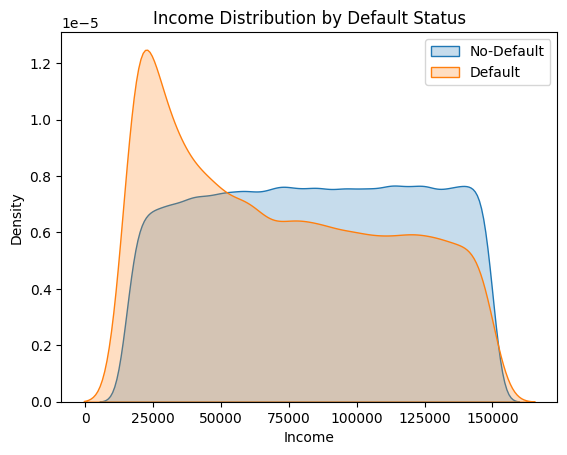

In [85]:
sns.kdeplot(df[df['Default']==0]['Income'],label="No-Default",fill=True)
sns.kdeplot(df[df['Default']==1]['Income'],label="Default",fill=True)

plt.title("Income Distribution by Default Status")
plt.xlabel("Income")
plt.ylabel("Density")
plt.legend()
plt.show()

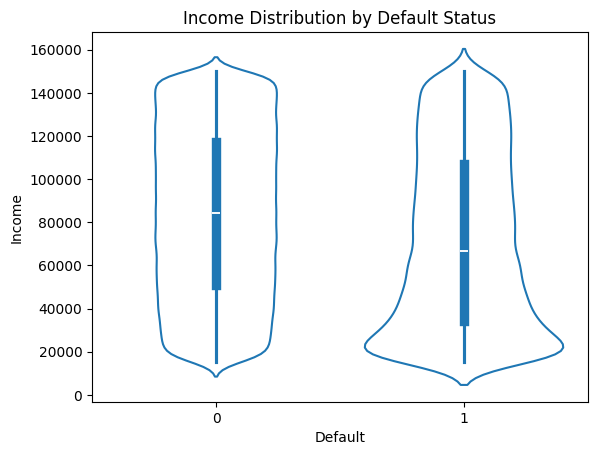

In [86]:
sns.violinplot(x=df['Default'],y=df['Income'],fill=False)
#sns.violinplot(df[df['Default']==1]['Income'],label="Default",fill=False)
plt.title("Income Distribution by Default Status")
plt.xlabel("Default")
plt.ylabel("Income")

plt.show()

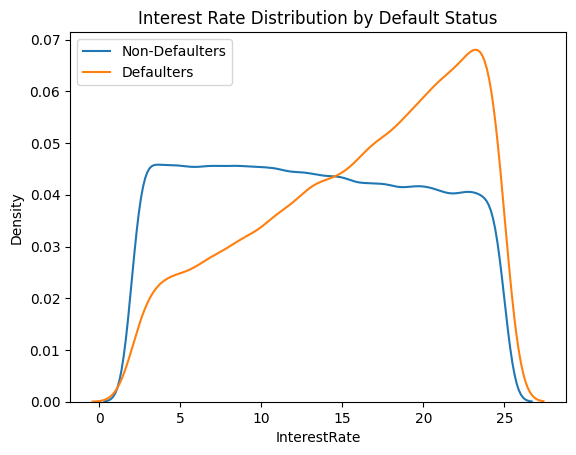

In [87]:
plt.title("Interest Rate Distribution by Default Status")
sns.kdeplot(data=df[df['Default']==0]['InterestRate'], label='Non-Defaulters')
sns.kdeplot(data=df[df['Default']==1]['InterestRate'], label='Defaulters')
plt.legend()


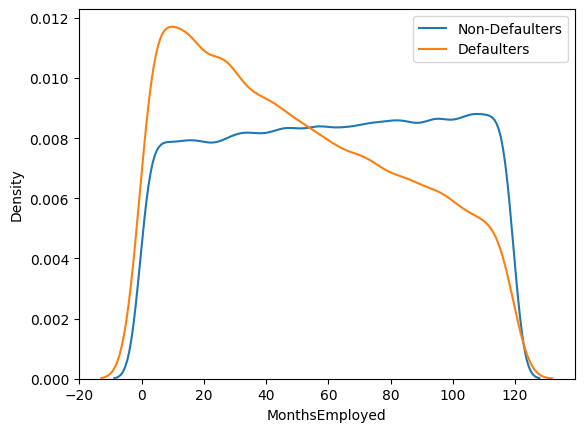

In [88]:
sns.kdeplot(data=df[df['Default'] == 0]['MonthsEmployed'], label='Non-Defaulters')
sns.kdeplot(data=df[df['Default'] == 1]['MonthsEmployed'], label='Defaulters')
plt.legend()


In [89]:
df.groupby('Default')['MonthsEmployed'].mean()

Default
0    60.764721
1    50.235457
Name: MonthsEmployed, dtype: float64

<Axes: xlabel='Default', ylabel='MonthsEmployed'>

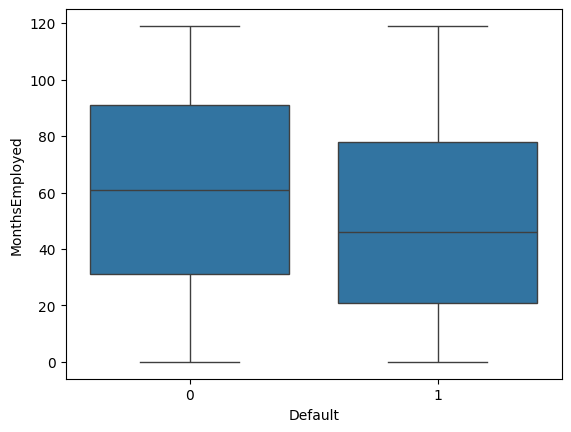

In [90]:
sns.boxplot(x=df['Default'],y=df['MonthsEmployed'])

 From Employment Duration for the Non_Defaulters is 60/12=5 years.

And for Defaulters the mean is 42..

So, we can say "Months Employed" is greater than 5 years is more likely to repay the Loan .

<Axes: xlabel='Default', ylabel='LoanTerm'>

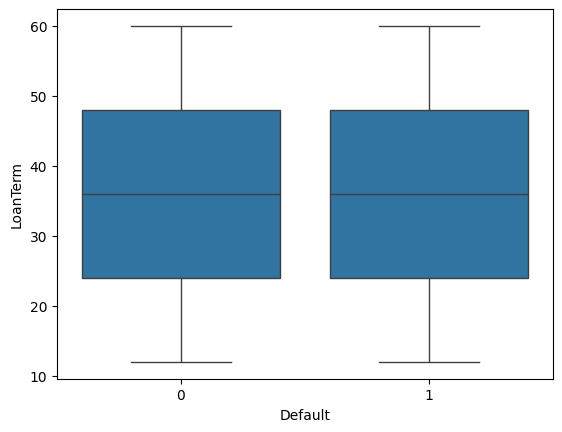

In [91]:
sns.boxplot(x=df['Default'],y=df['LoanTerm'])

Distribution is same for both default and non defaulters.We can't interpt the LoanTerm vs default status.

In [92]:
df.groupby('Default')['Education'].describe()


,count,unique,top,freq
Default,,,,
0,225694,4,PhD,56811
1,29653,4,High School,8230


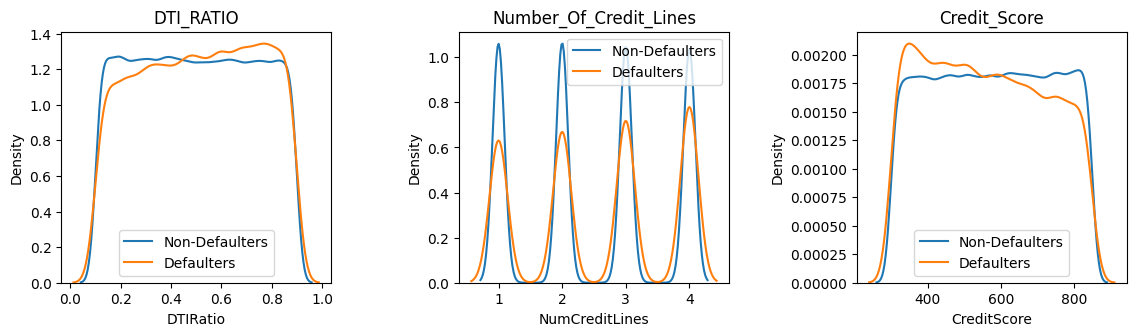

In [93]:
plt.figure(figsize=(12,4),dpi=100)

plt.subplot(1,3,1)
plt.title("DTI_RATIO")
sns.kdeplot(data=df[df['Default']==0]['DTIRatio'], label='Non-Defaulters')
sns.kdeplot(data=df[df['Default']==1]['DTIRatio'], label='Defaulters')
plt.legend()


plt.subplot(1,3,2)
plt.title("Number_Of_Credit_Lines")
sns.kdeplot(data=df[df['Default']==0]['NumCreditLines'], label='Non-Defaulters')
sns.kdeplot(data=df[df['Default']==1]['NumCreditLines'], label='Defaulters')
plt.legend()

plt.subplot(1,3,3)
plt.title("Credit_Score")
sns.kdeplot(data=df[df['Default']==0]['CreditScore'], label='Non-Defaulters')
sns.kdeplot(data=df[df['Default']==1]['CreditScore'], label='Defaulters')
plt.legend()

plt.tight_layout(pad=3.0)

plt.show()

In [94]:
df[df['Default']==1]

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,AgeGroup
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1,40-50
5,A9S62RQ7US,25,90298,90448,720,18,2,22.72,24,0.10,High School,Unemployed,Single,Yes,No,Business,Yes,1,20-30
8,1R0N3LGNRJ,36,42053,92357,827,83,1,23.94,48,0.20,Bachelor's,Self-employed,Divorced,Yes,No,Education,No,1,30-40
11,Y8UETC3LSG,28,149227,139759,375,56,3,5.84,36,0.80,PhD,Full-time,Divorced,No,No,Education,Yes,1,20-30
18,O1IKKLC69B,19,40718,78515,319,119,2,14.00,24,0.17,Bachelor's,Self-employed,Divorced,Yes,No,Education,No,1,10-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255310,F40NYFL3QR,65,111206,112192,315,3,3,20.17,36,0.63,High School,Unemployed,Married,Yes,Yes,Auto,No,1,60-70
255324,Q8OXUYF0TI,50,34641,108855,347,17,4,11.77,24,0.47,PhD,Unemployed,Divorced,Yes,No,Business,No,1,50-60
255333,BM4B25R7EI,22,45575,43355,545,99,1,21.86,12,0.52,PhD,Unemployed,Married,Yes,Yes,Education,No,1,20-30
255341,AKXAXQN7PG,40,129890,116119,701,38,3,9.91,24,0.23,High School,Part-time,Divorced,Yes,No,Home,Yes,1,40-50


In [95]:
counts = df['Education'].value_counts().reset_index()
counts.columns = ['Education', 'Default']
print(counts)

     Education  Default
0   Bachelor's    64366
1  High School    63903
2     Master's    63541
3          PhD    63537


<Axes: xlabel='Default', ylabel='count'>

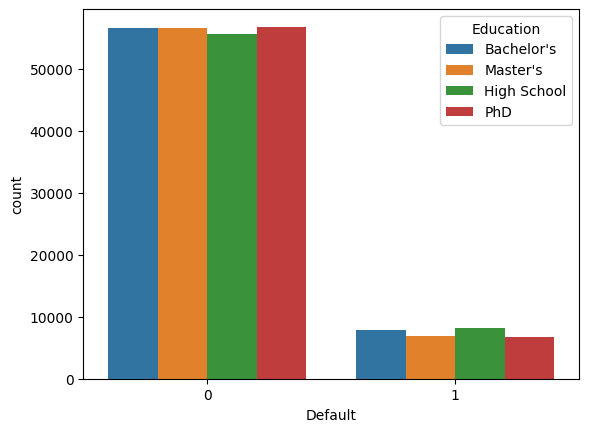

In [96]:
sns.countplot(data=df,x='Default',hue='Education')

<Axes: xlabel='Default', ylabel='count'>

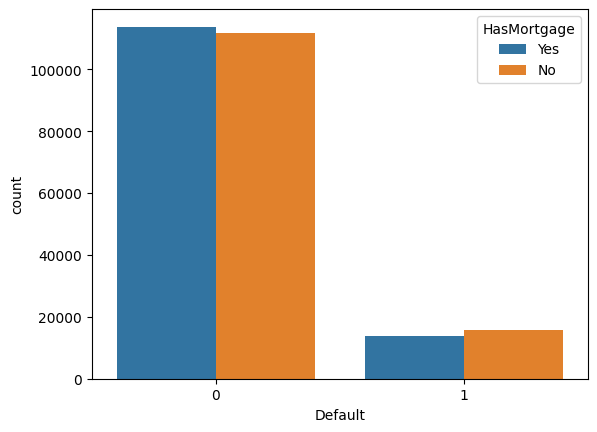

In [97]:
sns.countplot(data=df,x='Default',hue='HasMortgage')

<Axes: xlabel='Default', ylabel='count'>

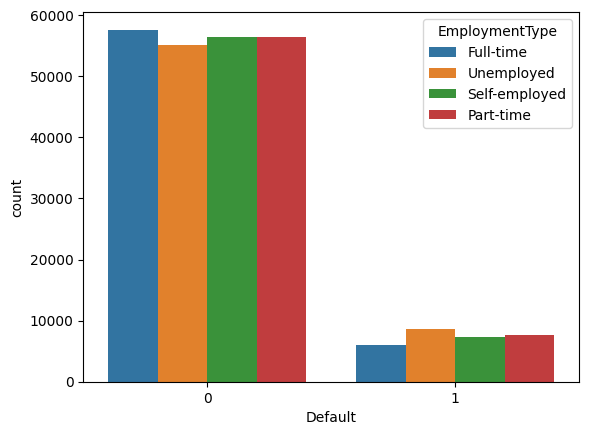

In [98]:
sns.countplot(data=df,x='Default',hue='EmploymentType')

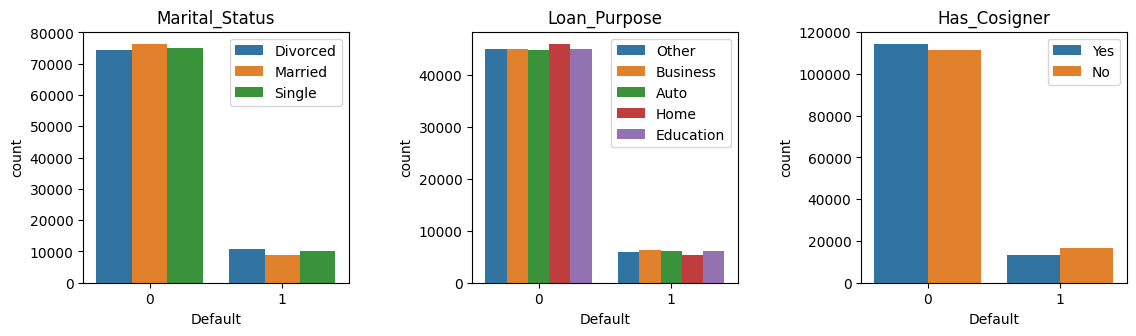

In [99]:
plt.figure(figsize=(12,4),dpi=100)

plt.subplot(1,3,1)
plt.title("Marital_Status")
sns.countplot(data=df,x='Default',hue='MaritalStatus')
plt.legend()


plt.subplot(1,3,2)
plt.title("Loan_Purpose")
sns.countplot(data=df,x='Default',hue='LoanPurpose')
plt.legend()

plt.subplot(1,3,3)
plt.title("Has_Cosigner")
sns.countplot(data=df,x='Default',hue='HasCoSigner')
plt.legend()

plt.tight_layout(pad=3.0)

plt.show()

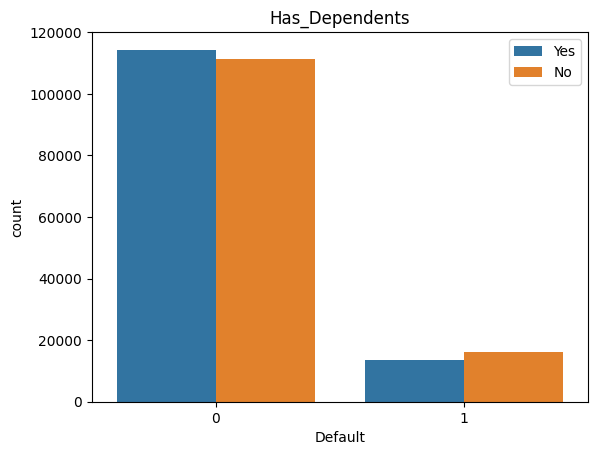

In [100]:

plt.title("Has_Dependents")
sns.countplot(data=df,x='Default',hue='HasDependents')
plt.legend()

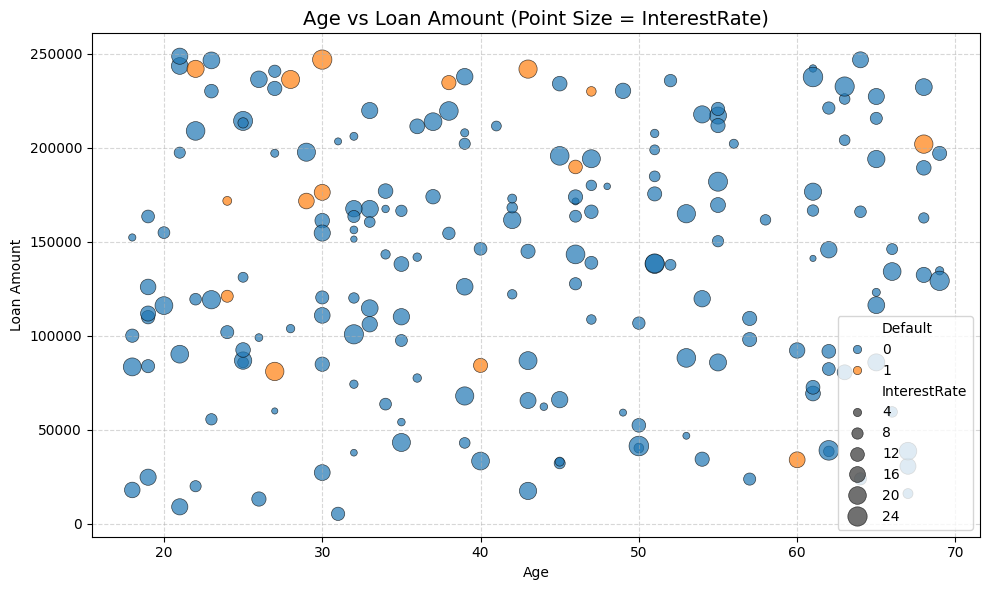

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample only 100 rows for clarity (change number if needed)
sample_df = df.sample(n=200, random_state=1)

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sample_df,
                x='Age',
                y='LoanAmount',
                hue='Default',
                size='InterestRate',       # Point size based on credit lines
                sizes=(20, 200),             # Min and max bubble sizes
                alpha=0.7,
                color='royalblue',
                edgecolor='black')

# Labels and title
plt.title('Age vs Loan Amount (Point Size = InterestRate)', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Loan Amount')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [102]:
def calculate_emi(loan_amount, annual_interest_rate, loan_term_months):
    r = annual_interest_rate / (12 * 100)  # Monthly interest rate
    n = loan_term_months
    if r == 0:  # Zero interest case
        emi = loan_amount / n
    else:
        emi = loan_amount * r * (1 + r)**n / ((1 + r)**n - 1)
    return emi

# Apply function to DataFrame
df['EMI'] = df.apply(lambda row: calculate_emi(row['LoanAmount'], row['InterestRate'], row['LoanTerm']), axis=1)

In [103]:
df['MonthlyIncome'] = df['Income'].astype(float) / 12
df['Debt']=df['MonthlyIncome']*df['DTIRatio']
df['total_income']=df['MonthlyIncome']*df['LoanTerm']

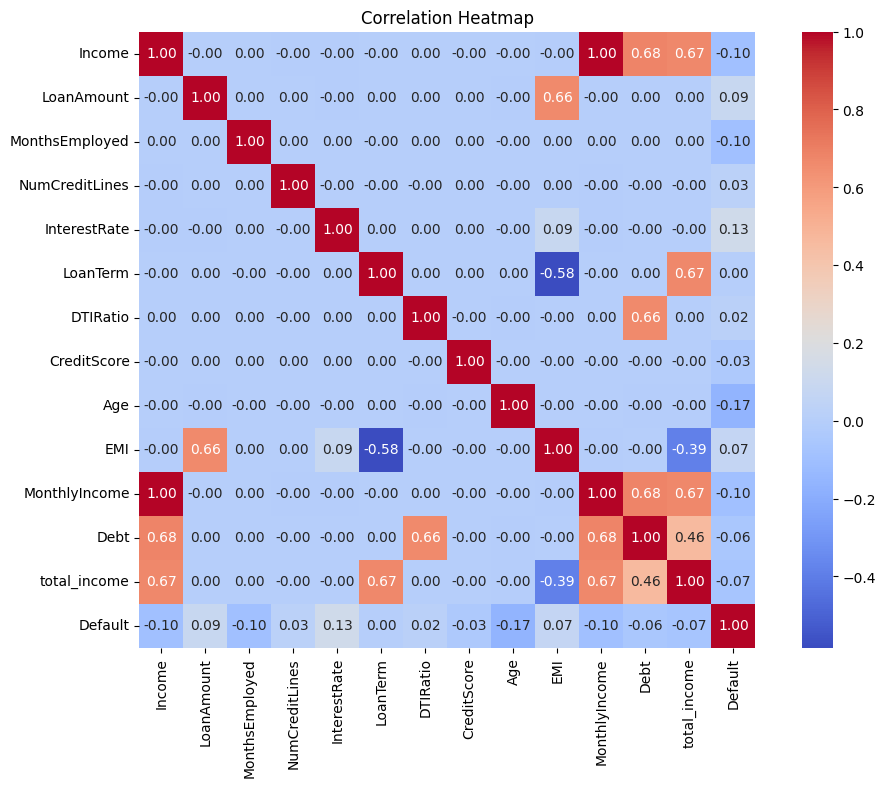

In [104]:
numeric_cols = ['Income', 'LoanAmount', 'MonthsEmployed', 'NumCreditLines', 'InterestRate',
                'LoanTerm', 'DTIRatio', 'CreditScore',
                'Age', 'EMI', 'MonthlyIncome', 'Debt', 'total_income', 'Default']

corr = df[numeric_cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()

In [105]:
df.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner', 'Default',
       'AgeGroup', 'EMI', 'MonthlyIncome', 'Debt', 'total_income'],
      dtype='object')

In [106]:
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   LoanID          255347 non-null  category
 1   Age             255347 non-null  int64   
 2   Income          255347 non-null  int64   
 3   LoanAmount      255347 non-null  int64   
 4   CreditScore     255347 non-null  int64   
 5   MonthsEmployed  255347 non-null  int64   
 6   NumCreditLines  255347 non-null  int64   
 7   InterestRate    255347 non-null  float64 
 8   LoanTerm        255347 non-null  int64   
 9   DTIRatio        255347 non-null  float64 
 10  Education       255347 non-null  category
 11  EmploymentType  255347 non-null  category
 12  MaritalStatus   255347 non-null  category
 13  HasMortgage     255347 non-null  category
 14  HasDependents   255347 non-null  category
 15  LoanPurpose     255347 non-null  category
 16  HasCoSigner     255347 non-null  categ

In [107]:
df.drop(columns=['LoanID'])
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.select_dtypes(include='category').columns:
  df[col] = le.fit_transform(df[col])

In [108]:
from sklearn.preprocessing import StandardScaler
x=df.drop(columns=['Default'])
y=df['Default']
sc=StandardScaler()
standard_data=sc.fit_transform(x)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(standard_data,y,test_size=0.2,random_state=42)

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
model=LogisticRegression(solver='liblinear')
model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


9
8
7
6
5
4
3
2
1


In [ ]:
j=complex(2i)
print(j)

<class 'complex'>
